<h1>Overarching aims of the exercises this week</h1>
The aim of the exercises this week is to train the neural network you implemented last week.

To train neural networks, we use gradient descent, since there is no analytical expression for the optimal parameters. This means you will need to compute the gradient of the cost function wrt. the network parameters. And then you will need to implement some gradient method.

You will begin by computing gradients for a network with one layer, then two layers, then any number of layers. Keeping track of the shapes and doing things step by step will be very important this week.

We recommend that you do the exercises this week by editing and running this notebook file, as it includes some checks along the way that you have implemented the neural network correctly, and running small parts of the code at a time will be important for understanding the methods. If you have trouble running a notebook, you can run this notebook in google colab instead(https://colab.research.google.com/drive/1FfvbN0XlhV-lATRPyGRTtTBnJr3zNuHL#offline=true&sandboxMode=true), though we recommend that you set up VSCode and your python environment to run code like this locally.

First, some setup code that you will need.

In [1]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


# Derivative of the ReLU function
def ReLU_der(z):
    return np.where(z > 0, 1, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def mse(predict, target):
    return np.mean((predict - target) ** 2)


<h1>Exercise 1 - Understand the feed forward pass</h1>
a) Complete last weeks’ mandatory exercises if you haven’t already.

<h1>Exercise 2 - Gradient with one layer using autograd</h1>
For the first few exercises, we will not use batched inputs. Only a single input vector is passed through the layer at a time.

In this exercise you will compute the gradient of a single layer. You only need to change the code in the cells right below an exercise, the rest works out of the box. Feel free to make changes and see how stuff works though!

**a)** If the weights and bias of a layer has shapes (10, 4) and (10), what will the shapes of the gradients of the cost function wrt. these weights and this bias be?

The gradients will match the shapes of the weights and biases. Meaning that the gradients for the weights will have the shape (10, 4), whilst the gradients for the biases will have the shape (10). 

**b)** Complete the feed_forward_one_layer function. It should use the sigmoid activation function. Also define the weigth and bias with the correct shapes.


In [2]:
def feed_forward_one_layer(W, b, x):
    z = W @ x + b
    a = sigmoid(z)
    return a


def cost_one_layer(W, b, x, target):
    predict = feed_forward_one_layer(W, b, x)
    return mse(predict, target)


x = np.random.rand(2)
target = np.random.rand(3)

W = np.random.rand(3,2)
b = np.random.rand(3)

**c)** Compute the gradient of the cost function wrt. the weigth and bias by running the cell below. You will not need to change anything, just make sure it runs by defining things correctly in the cell above. This code uses the autograd package which uses backprogagation to compute the gradient!

In [3]:
autograd_one_layer = grad(cost_one_layer, [0, 1])
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[ 0.04441685  0.03220962]
 [ 0.03895473  0.02824868]
 [-0.00794992 -0.00576502]] [ 0.07376624  0.06469492 -0.01320301]


<h1>Exercise 3 - Gradient with one layer writing backpropagation by hand</h1>
Before you use the gradient you found using autograd, you will have to find the gradient “manually”, to better understand how the backpropagation computation works. To do backpropagation “manually”, you will need to write out expressions for many derivatives along the computation.

We want to find the gradient of the cost function wrt. the weight and bias. This is quite hard to do directly, so we instead use the chain rule to combine multiple derivatives which are easier to compute.

**a)** Which intermediary results can be reused between the two expressions?

The deriviatives of the cost function wrt. a and z can be reused between deriviative of the cost function wrt. weights and bias. 

**b)** What is the derivative of the cost wrt. the final activation? You can use the autograd calculation to make sure you get the correct result. Remember that we compute the mean in mse.



In [4]:
z = W @ x + b
a = sigmoid(z)

predict = a


def mse_der(predict, target):
    return 2 * (predict - target) / len(predict)


print(mse_der(predict, target))

cost_autograd = grad(mse, 0)
print(cost_autograd(predict, target))


[ 0.39773785  0.38318056 -0.07322665]
[ 0.39773785  0.38318056 -0.07322665]


**c)** What is the expression for the derivative of the sigmoid activation function? You can use the autograd calculation to make sure you get the correct result.

In [5]:
def sigmoid_der(z):
    return sigmoid(z)*(1-sigmoid(z))    


print(sigmoid_der(z))

sigmoid_autograd = elementwise_grad(sigmoid, 0)
print(sigmoid_autograd(z))

[0.18546448 0.16883663 0.18030332]
[0.18546448 0.16883663 0.18030332]


**d)** Using the two derivatives you just computed, compute this intermetidary gradient you will use later:

In [6]:
dC_da = mse_der(predict,target)
dC_dz = dC_da * sigmoid_der(z)

**e)** What is the derivative of the intermediary z wrt. the weight and bias? What should the shapes be? The one for the weights is a little tricky, it can be easier to play around in the next exercise first. You can also try computing it with autograd to get a hint.

Z, the pre-activation function value, is calculated as z = W * x + b, hence the deriviate of z wrt. weights and biases is respectively x and 1.
The shapes of dZ/dW and dZ/dW is (3,2) and (3). 

**f)** Now combine the expressions you have worked with so far to compute the gradients! Note that you always need to do a feed forward pass while saving the zs and as before you do backpropagation, as they are used in the derivative expressions

In [7]:
dC_da = dC_da   #Already computed
dC_dz = dC_dz   #Already computed
dC_dW = np.outer(dC_dz, x)
dC_db = dC_dz

print(dC_dW, dC_db)

[[ 0.04441685  0.03220962]
 [ 0.03895473  0.02824868]
 [-0.00794992 -0.00576502]] [ 0.07376624  0.06469492 -0.01320301]


In [8]:
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[ 0.04441685  0.03220962]
 [ 0.03895473  0.02824868]
 [-0.00794992 -0.00576502]] [ 0.07376624  0.06469492 -0.01320301]


<h1>Exercise 4 - Gradient with two layers writing backpropagation by hand</h1>
Now that you have implemented backpropagation for one layer, you have found most of the expressions you will need for more layers. Let’s move up to two layers.

In [9]:
x = np.random.rand(2)
target = np.random.rand(4)

W1 = np.random.rand(3, 2)
b1 = np.random.rand(3)

W2 = np.random.rand(4, 3)
b2 = np.random.rand(4)

layers = [(W1, b1), (W2, b2)]

In [10]:
z1 = W1 @ x + b1
a1 = sigmoid(z1)
z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

We begin by computing the gradients of the last layer, as the gradients must be propagated backwards from the end.

**a)** Compute the gradients of the last layer, just like you did the single layer in the previous exercise.

In [11]:
dC_da2 = mse_der(a2,target)
dC_dz2 = dC_da2 * sigmoid_der(z2)
dC_dW2 = np.outer(dC_dz2,a1)
dC_db2 = dC_dz2

To find the derivative of the cost wrt. the activation of the first layer, we need a new expression, the one furthest to the right in the following.

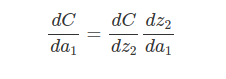

**b)** What is the derivative of the second layer intermetiate wrt. the first layer activation? (First recall how you compute 
z2)

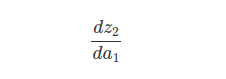

z2 = W2 * a1 + b2
dC/da1 = dC/dz2 * W2

dz2/da1 = W2

**c)** Use this expression, together with expressions which are equivelent to ones for the last layer to compute all the derivatives of the first layer.

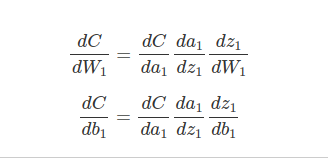

In [12]:
dC_da1 = dC_dz2 @ W2
dC_dz1 = dC_da1 * sigmoid_der(z1)
dC_dW1 = np.outer(dC_dz1,x)
dC_db1 = dC_dz1

In [13]:
print(dC_dW1, dC_db1)
print(dC_dW2, dC_db2)

[[0.00272825 0.00580887]
 [0.00190885 0.00406425]
 [0.00304258 0.00647814]] [0.0159618  0.01116787 0.01780084]
[[0.00224052 0.00288615 0.0024246 ]
 [0.03234659 0.04166757 0.03500417]
 [0.02713584 0.0349553  0.02936532]
 [0.00895298 0.01153286 0.00968855]] [0.00385811 0.05569981 0.04672707 0.01541675]


In [14]:
def feed_forward_two_layers(layers, x):
    W1, b1 = layers[0]
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)

    W2, b2 = layers[1]
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    return a2

In [15]:
def cost_two_layers(layers, x, target):
    predict = feed_forward_two_layers(layers, x)
    return mse(predict, target)


grad_two_layers = grad(cost_two_layers, 0)
grad_two_layers(layers, x, target)

[(array([[0.00272825, 0.00580887],
         [0.00190885, 0.00406425],
         [0.00304258, 0.00647814]]),
  array([0.0159618 , 0.01116787, 0.01780084])),
 (array([[0.00224052, 0.00288615, 0.0024246 ],
         [0.03234659, 0.04166757, 0.03500417],
         [0.02713584, 0.0349553 , 0.02936532],
         [0.00895298, 0.01153286, 0.00968855]]),
  array([0.00385811, 0.05569981, 0.04672707, 0.01541675]))]

**e)** How would you use the gradient from this layer to compute the gradient of an even earlier layer? Would the expressions be any different?

To compute the gradient of an even earlier layer, I would extend the chain rule, as I did when calculating the first hidden layer in the example above, to include the earlier layer. The expressions for calculating the gradients in the given layer wouldn't be any different, but naturally using different weight, biases, etc. 

<h1>Exercise 5 - Gradient with any number of layers writing backpropagation by hand</h1>
Well done on getting this far! Now it’s time to compute the gradient with any number of layers.

First, some code from the general neural network code from last week. Note that we are still sending in one input vector at a time. We will change it to use batched inputs later.

In [16]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

You might have already have noticed a very important detail in backpropagation: You need the values from the forward pass to compute all the gradients! The feed forward method above is great for efficiency and for using autograd, as it only cares about computing the final output, but now we need to also save the results along the way.

Here is a function which does that for you.

In [17]:
def feed_forward_saver(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W @ a + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

**a)** Now, complete the backpropagation function so that it returns the gradient of the cost function wrt. all the weigths and biases. Use the autograd calculation below to make sure you get the correct answer.

In [18]:
def backpropagation(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = dC_dz @ W

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.outer(dC_dz, layer_input)
        dC_db = dC_dz

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [19]:
network_input_size = 2
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.rand(network_input_size)
target = np.random.rand(4)

In [20]:
layer_grads = backpropagation(x, layers, activation_funcs, target, activation_ders)
print(layer_grads)

[(array([[-0.01695578, -0.03177109],
       [ 0.08629625,  0.16169856],
       [ 0.06190221,  0.11598995]]), array([-0.04315025,  0.21961266,  0.15753301])), (array([[ 0.19497687,  0.18778429,  0.2571645 ],
       [ 0.02311709,  0.02226432,  0.03049026],
       [-0.        , -0.        , -0.        ],
       [ 0.13217221,  0.12729646,  0.17432837]]), array([ 0.44362302,  0.05259739, -0.        ,  0.30072611]))]


In [21]:
cost_grad = grad(cost, 0)
cost_grad(layers, x, [sigmoid, ReLU], target)

[(array([[-0.01695578, -0.03177109],
         [ 0.08629625,  0.16169856],
         [ 0.06190221,  0.11598995]]),
  array([-0.04315025,  0.21961266,  0.15753301])),
 (array([[0.19497687, 0.18778429, 0.2571645 ],
         [0.02311709, 0.02226432, 0.03049026],
         [0.        , 0.        , 0.        ],
         [0.13217221, 0.12729646, 0.17432837]]),
  array([0.44362302, 0.05259739, 0.        , 0.30072611]))]

<h1>Exercise 6 - Batched inputs</h1>
Make new versions of all the functions in exercise 5 which now take batched inputs instead. See last weeks exercise 5 for details on how to batch inputs to neural networks. You will also need to update the backpropogation function.

In [22]:
def cost_batch(layers, input, activation_funcs, target):
    _,_,predict = feed_forward_saver_batch(input, layers, activation_funcs)
    return mse(predict, target)

def feed_forward_saver_batch(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W.T + b
        a = activation_func(z)

        zs.append(z)
    return layer_inputs, zs, a

def backpropagation_batch(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver_batch(input, layers, activation_funcs)

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict, target)
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = dC_dz @ W

        dC_dz = dC_da * activation_der(z)
        dC_dW = np.outer(dC_dz, layer_input)
        dC_db = dC_dz

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [23]:
input_features = 2
input_rows = 5
layer_output_sizes = [3, 4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(input_features, layer_output_sizes) #Batched inputs doesnt change the architecture of the model

x = np.random.rand(input_rows,input_features)
print(x)
target = np.random.rand(input_rows,4)
print(target)

[[0.76834017 0.73116322]
 [0.15785983 0.38154209]
 [0.83897134 0.90488018]
 [0.57065433 0.91615312]
 [0.79859466 0.7676037 ]]
[[0.944537   0.05152937 0.08452191 0.77653144]
 [0.84701322 0.21009951 0.19450933 0.74888316]
 [0.15170188 0.81722607 0.92584086 0.62123417]
 [0.06051295 0.99294866 0.81756599 0.44784539]
 [0.35933874 0.05639776 0.82661178 0.05176343]]


In [24]:
layer_grads = backpropagation_batch(x, layers, activation_funcs, target, activation_ders)

In [25]:
cost_grad = grad(cost_batch, 0)
cost_grad(layers, x, [sigmoid, ReLU], target)

[(array([[-0.00225973, -0.00471675],
         [ 0.01028849,  0.01109508],
         [-0.05943463, -0.07055526]]),
  array([-0.00506251,  0.01195453, -0.08023343])),
 (array([[ 0.03835485,  0.09198361,  0.01710988],
         [-0.04302817, -0.09404647, -0.02024412],
         [ 0.00852488,  0.00877801,  0.00518695],
         [-0.07369943, -0.13467089, -0.03787447]]),
  array([ 0.11029275, -0.11648429,  0.01467895, -0.17553811]))]

<h1>Exercise 7 - Training</h1>

**a)** Complete exercise 6 and 7 from last week, but use your own backpropogation implementation to compute the gradient.

**b)** Use stochastic gradient descent with momentum when you train your network.

Exercise 6 from week 42 (Prediction on real data, untrained!)

In [26]:
def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

def softmax_der(z):
    s = softmax(z).reshape(-1, 1)  # Reshape to make it a column vector
    return np.diagflat(s) - np.dot(s, s.T)


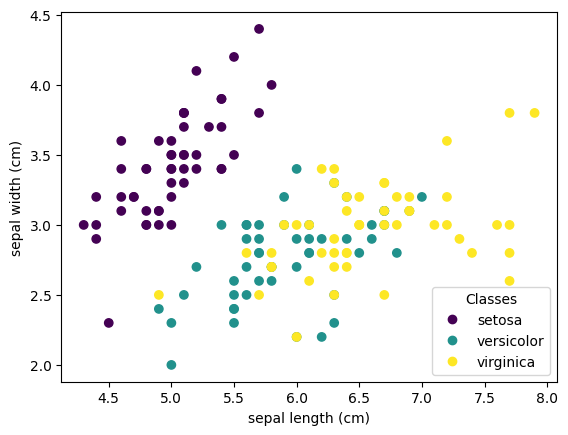

In [27]:
iris = datasets.load_iris()
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
    )

In [28]:
inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1


def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

In [29]:
rows, features = iris.data.shape
rows_2, classes = targets.shape
layers = create_layers(features,[8,classes])
activations = [sigmoid, softmax]
activation_ders = [sigmoid_der, softmax_der]

print(layers)

[(array([[ 0.66365406, -0.41908403, -1.61729283,  0.05834875],
       [ 0.29015357, -0.52654543,  0.02629061,  1.00256745],
       [-0.83889261, -1.50002552, -0.31563957,  1.89844432],
       [-1.16596207, -0.50935779, -0.936486  ,  0.51326901],
       [-0.41587127, -0.39105913,  1.3355858 ,  1.47749935],
       [-0.14956499, -1.84801298, -0.5459246 ,  0.41484969],
       [-0.45657806,  0.28671518, -0.46401312, -0.67968461],
       [-0.56049471,  0.20262744, -0.56923493,  1.62941396]]), array([ 0.02890211,  1.98833078, -0.96854121,  0.25784516, -0.81976628,
        0.32786546, -0.00926143, -0.06652192])), (array([[-0.34503612, -1.55470677,  0.77621408,  1.21188615, -0.50627119,
         0.09852133, -1.76172458, -0.14203295],
       [ 0.09603313, -1.79000492,  0.65043773,  1.90243824,  1.29943216,
         0.66441785,  1.60363845,  1.02300345],
       [ 0.18112742,  1.36481293,  0.12893995, -0.07762077,  0.87944335,
         1.86060914, -1.83220387,  0.11214372]]), array([-0.1062213 , -

In [30]:
_,_,predictions = feed_forward_saver_batch(iris.data, layers, activations)
score = accuracy(predictions, targets)
print(score)

0.68


Exercise 7 from week 42 (Training on real data)

In [31]:
def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))

def cross_entropy_der(predict, target):
    return predict - target

def cost_batch(input, layers, activation_funcs, target):
    _,_,predict = feed_forward_saver_batch(input, layers, activation_funcs)
    return cross_entropy(predict, target)

In [32]:
def sgd_momentum(X, y, layers, activation_funcs, activation_ders, cost_der, learning_rate=0.1, epochs=50, mb_size=5, momentum=0.3, tolerance=1e-6):
    m, n = X.shape
    iterations = int(m / mb_size)
    beta = np.zeros((n, 1))
    prev_loss = float("inf")
    velocity = 0


    for epoch in range(epochs):
        for i in range(iterations):
            index = mb_size * np.random.randint(iterations)
            Xi = X[index : index + mb_size] if index + mb_size <= m else X[index:m]
            yi = y[index : index + mb_size] if index + mb_size <= m else y[index:m]
            layersi = layers[index : index + mb_size] if index + mb_size <= m else layers[index:m]
            
            gradient = backpropagation_batch(X, layersi, activation_funcs, y, activation_ders, cost_der)
            velocity = momentum * velocity - learning_rate * gradient
            layers += velocity

            _,_,a = feed_forward_saver_batch(Xi, layers, activation_funcs)
            print(a)
            score = cross_entropy(a, yi)

            if abs(prev_loss - score) < tolerance:
                return beta, i, epoch
            prev_score = score

    return beta, iterations, epochs

In [33]:
sgd_momentum(x, target, layers, layer_grads, activations, activation_ders, cross_entropy_der)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)